In [1]:
import pandas as pd
import geopandas
import matplotlib
import matplotlib.pyplot as plt

Selecionando arbovirose

In [2]:
arbo_v = "dengue"
# arbo_v = "chikungunya"
# arbo_v = "zika"

ano_plotado = 2020

In [5]:
map = "./Map/Map.shp"

if arbo_v == "dengue":
    anos = 10
else:
    anos = 5
dados = f"../scr/{arbo_v}/casos_municipio_{anos}.csv"

bahia = geopandas.read_file(map)

df = pd.read_csv(dados)
df = df.drop(columns="Unnamed: 0")

In [6]:
for i in range (1, anos+2):
    bahia[f"{df.columns[1:][i]}"] = 0

for i in range (len(bahia)):
    for j in range (len(df)):
        if bahia.loc[i, "Município"] == df.loc[j, "Município"]:
            for k in range(1, anos+2):
                bahia.loc[i, f"{df.columns[1:][k]}"] = df.loc[j, f"{df.columns[1:][k]}"]


In [7]:
df = pd.read_csv("../scr/BA - IBGE 2010.csv")

In [8]:
bahia["População 2010"] = 0

for i in range (len(bahia)):
    for j in range (len(df)):
        if bahia.loc[i, "Município"] == df.loc[j, "Município"]:
            bahia.loc[i, "População 2010"] = df.loc[j, "População 2010"]

In [9]:
bahia.head()

,Município,CODIGO,geometry,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,População 2010
0,Nova Viçosa,2923001,"POLYGON ((-39.70855 -17.77303, -39.70812 -17.7...",60,185,826,53,32,601,385,9,152,157,13,38556
1,Mucuri,2922003,"POLYGON ((-40.21221 -17.73048, -40.21085 -17.7...",59,289,1740,193,154,507,166,54,611,175,254,36026
2,Ibirapuã,2912806,"POLYGON ((-40.14385 -17.62265, -40.14350 -17.6...",3,187,10,0,83,216,783,1,7,45,0,7956
3,Caravelas,2906907,"POLYGON ((-40.22508 -17.40671, -40.22353 -17.4...",65,265,332,28,77,260,14,3,28,111,34,21414
4,Lajedão,2918902,"POLYGON ((-40.32401 -17.39604, -40.32253 -17.3...",4,159,193,20,12,16,8,0,1,4,0,3733


In [10]:
plt.rcParams["figure.figsize"] = (10, 10)

In [11]:
bahia[f"{ano_plotado}"].describe()

count      417.000000
mean       257.465228
std        809.398791
min          0.000000
25%         24.000000
50%         87.000000
75%        224.000000
max      12122.000000
Name: 2020, dtype: float64

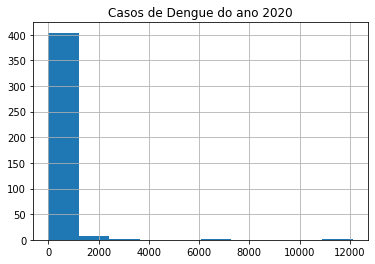

In [12]:
bahia.hist(column=f"{ano_plotado}")

if arbo_v == "dengue":
    plt.title(f"Casos de Dengue do ano {ano_plotado}")
elif arbo_v == "chikungunya":
    plt.title(f"Casos de Chikungunya do ano {ano_plotado}")
else:
    plt.title(f"Casos de Zika Vírus do ano {ano_plotado}")

Plotagem automatica

In [13]:
std_val = int(bahia[f"{ano_plotado}"].std())
max_val = bahia[f"{ano_plotado}"].max()
intervalo = [std_val, 2*std_val, 3*std_val, max_val]
intervalo

[809, 1618, 2427, 12122]

In [14]:
plt.rcParams["figure.figsize"] = (20, 20)

<AxesSubplot:>

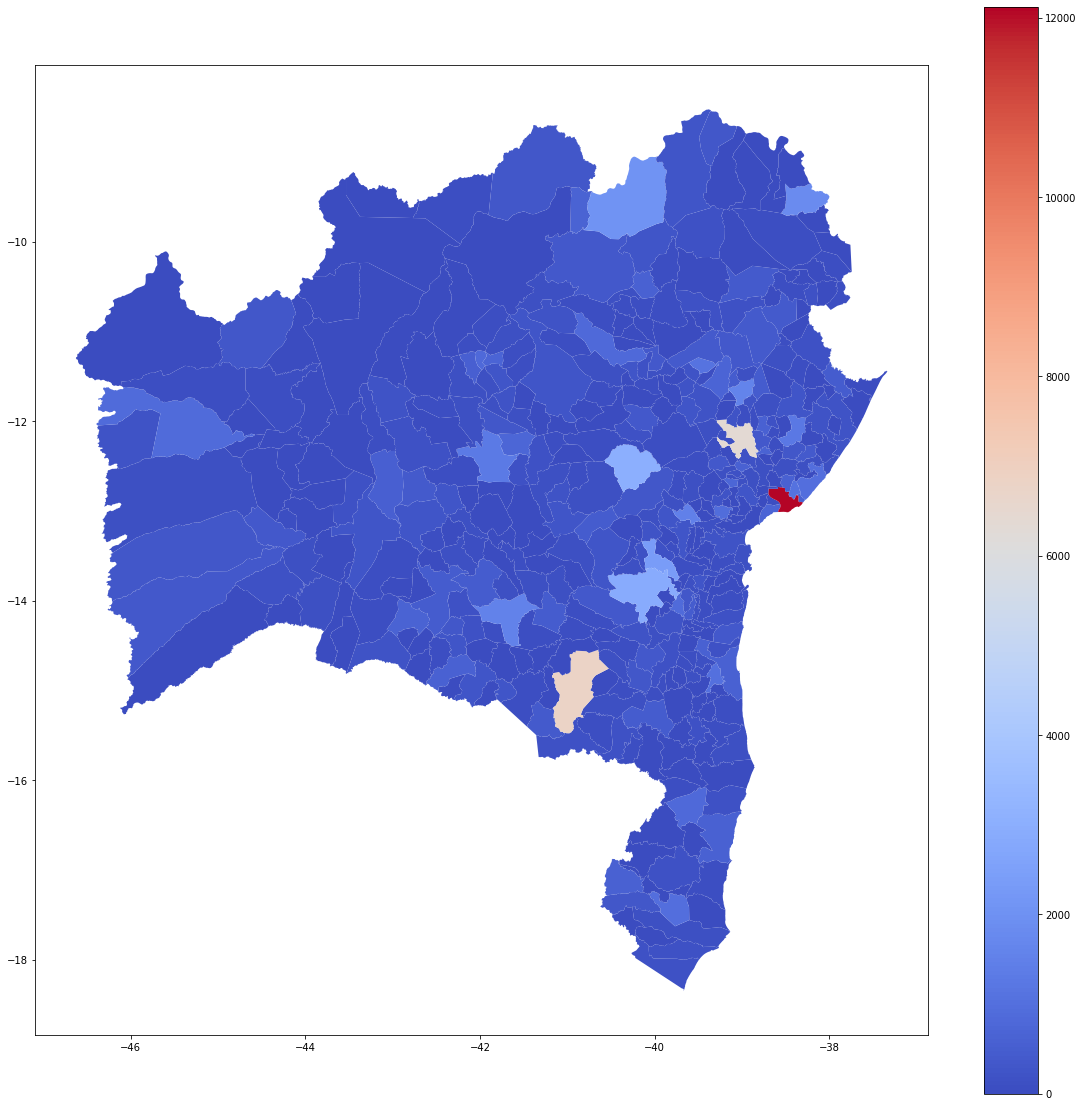

In [15]:
bahia.plot(column=f"{ano_plotado}", cmap='coolwarm', linewidth=1, legend=True)

Plotagem baseada em quantis

<AxesSubplot:>

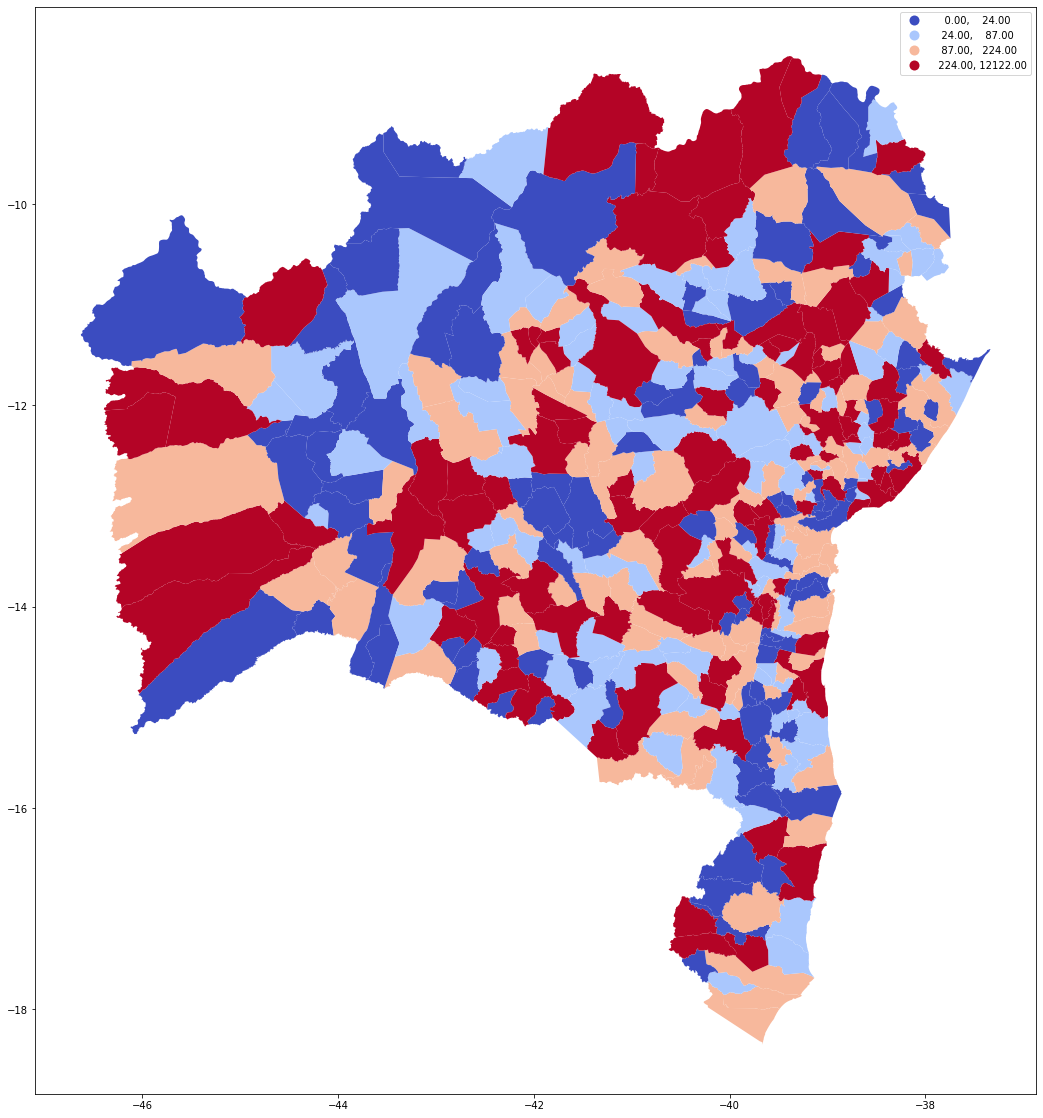

In [16]:
bahia.plot(column=f"{ano_plotado}", scheme='quantiles', k=4, cmap='coolwarm', linewidth=1, legend=True)

Plotagem baseada em desvio padrão

<AxesSubplot:>

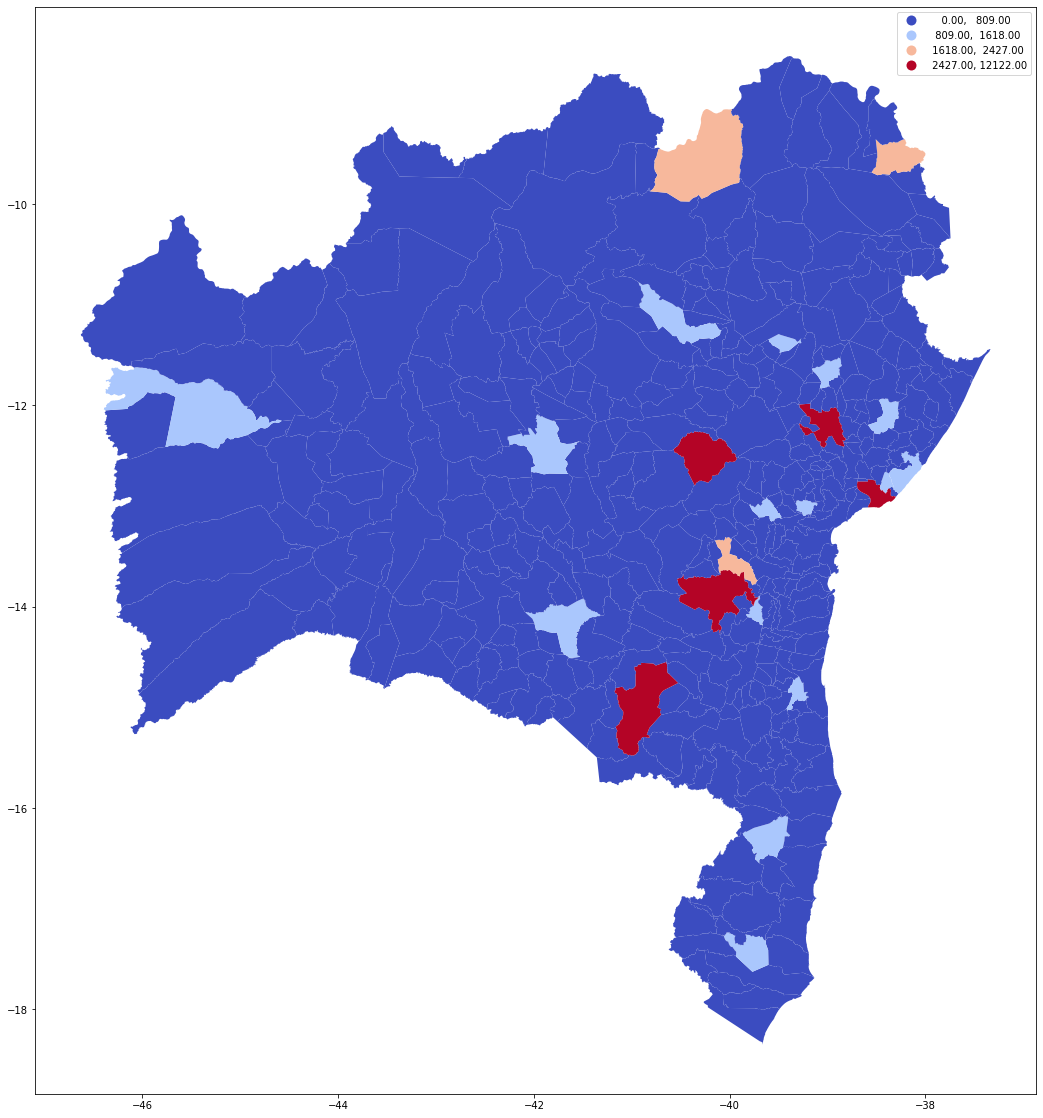

In [17]:
bahia.plot(column=f"{ano_plotado}", scheme='user_defined', classification_kwds={'bins':intervalo}, cmap='coolwarm', linewidth=1, legend=True)

In [38]:
bahia.head()

,Município,CODIGO,geometry,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,População 2010,Casos/População
0,Nova Viçosa,2923001,"POLYGON ((-39.70855 -17.77303, -39.70812 -17.7...",60,185,826,53,32,601,385,9,152,157,13,38556,0.03
1,Mucuri,2922003,"POLYGON ((-40.21221 -17.73048, -40.21085 -17.7...",59,289,1740,193,154,507,166,54,611,175,254,36026,0.71
2,Ibirapuã,2912806,"POLYGON ((-40.14385 -17.62265, -40.14350 -17.6...",3,187,10,0,83,216,783,1,7,45,0,7956,0.00
3,Caravelas,2906907,"POLYGON ((-40.22508 -17.40671, -40.22353 -17.4...",65,265,332,28,77,260,14,3,28,111,34,21414,0.16
4,Lajedão,2918902,"POLYGON ((-40.32401 -17.39604, -40.32253 -17.3...",4,159,193,20,12,16,8,0,1,4,0,3733,0.00


In [40]:
bahia["Casos_100.000hab"] = 0

In [41]:
for i in range (len(bahia)):
    bahia.loc[i, "Casos_100.000hab"] = round(bahia.iloc[i, 13]/bahia.iloc[i, 14] * 100000, 0)

<AxesSubplot:>

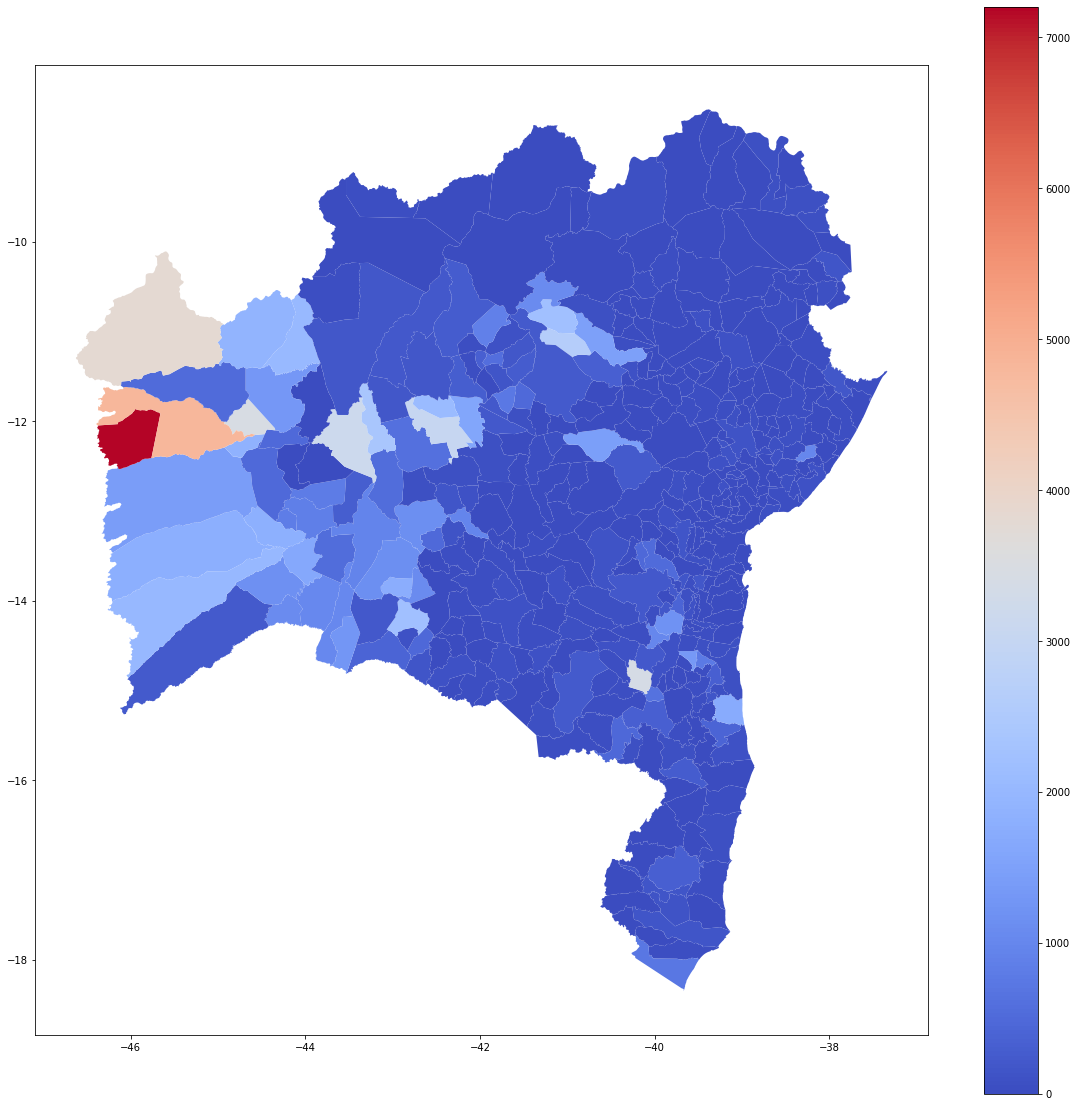

In [42]:
bahia.plot(column="Casos_100.000hab", cmap='coolwarm', linewidth=1, legend=True)